In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Input image
image = cv2.imread("Aerial Image.tif", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512,512))

In [21]:
# Function for power law
def power_law_transformation(image, gamma):
    transformed_image = image.copy()
    height, width = image.shape

    for r in range(height):
        for c in range(width):
            pixel = float(image[r,c]) / 255.0
            transformed_image[r,c] = (pixel**gamma) * 255

    return np.uint8(transformed_image)

In [22]:
# Function of inverse logarithmic
def inverse_logarithmic(image):
    c = 255 / np.log(256)
    transformed_image = np.exp(image/c) - 1

    return np.uint8(transformed_image)

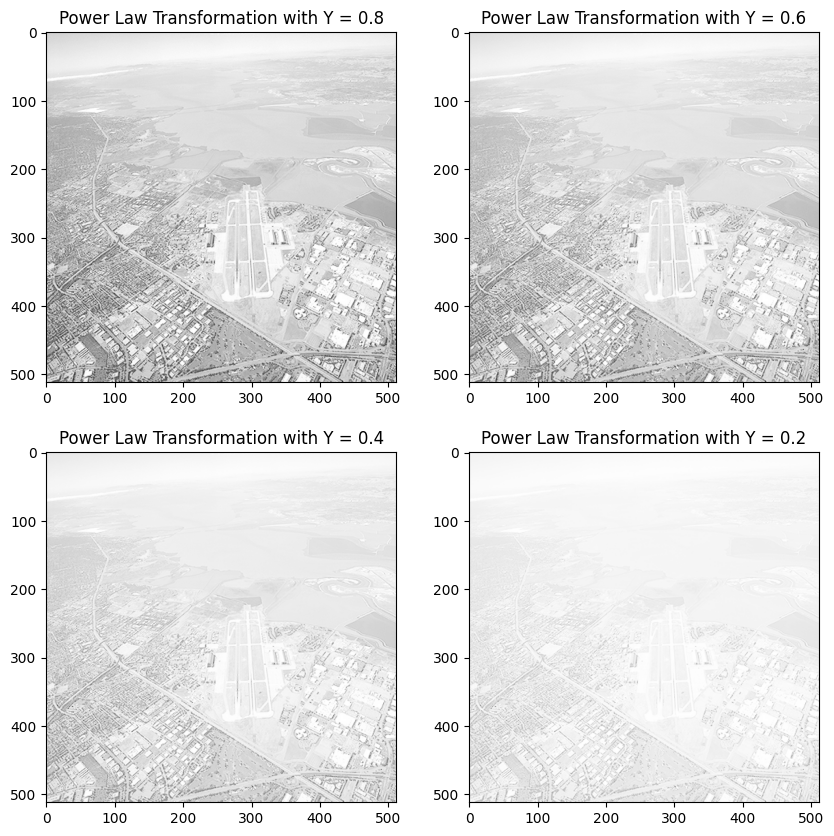

In [29]:
# Apply power law for gamma < 0
gammas, subplot_number = [0.8, 0.6, 0.4, 0.2], 1
plt.figure(figsize=(10,10))

for gamma in (gammas):
    transformed_image = power_law_transformation(image, gamma)
    plt.subplot(2,2,subplot_number)
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Power Law Transformation with Y = {gamma}")
    subplot_number += 1

plt.show()

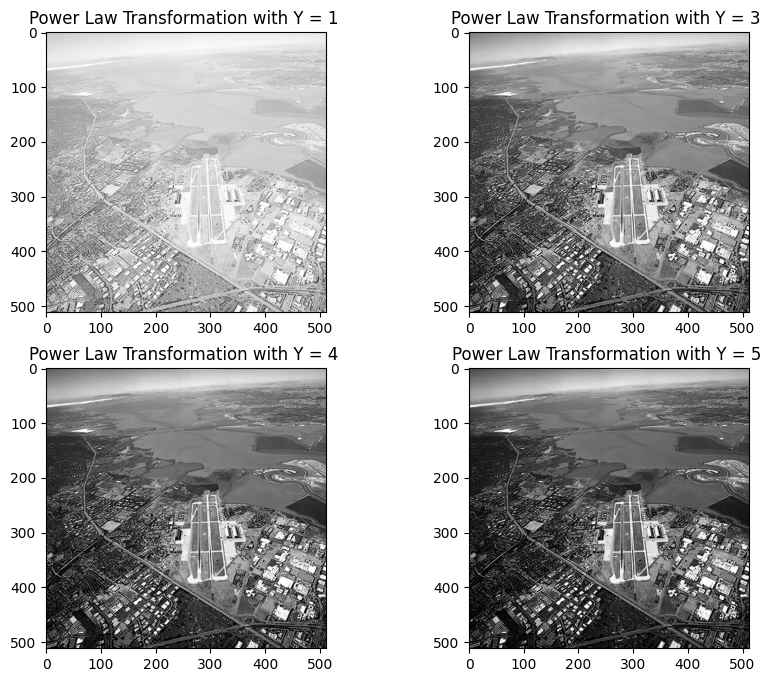

In [28]:
# Apply power law for gamma > 0
new_gammas, subplot_number = [1, 3, 4, 5], 1
plt.figure(figsize=(10,8))

for gamma in (new_gammas):
    new_transformed_image = power_law_transformation(image, gamma)
    plt.subplot(2,2,subplot_number)
    plt.imshow(cv2.cvtColor(new_transformed_image, cv2.COLOR_BGR2RGB))
    plt.title (f"Power Law Transformation with Y = {gamma} ")
    subplot_number += 1

plt.show()

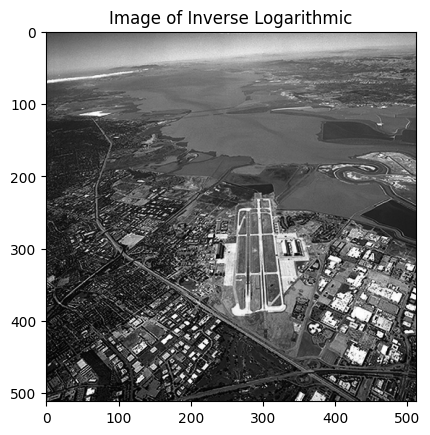

In [31]:
# Apply inverse Logarithmic
transformed_image = inverse_logarithmic(image)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Image of Inverse Logarithmic")
plt.show()